# **IMAGE PREPROCESSING USING SKIMAGE AND OPENCV :**

In this first part of the project we will be using SKimage, OpenCV and Matplotlib to get some insight about the data and preprocess it for further modeling.

## **DataSet that We will be using:**

Facial emotion recognition is the process of detecting human emotions from facial expressions. It has been a great source of communication between human beings, even they don't say a word. The human brain recognizes emotions automatically, and software has now been developed that can recognize emotions as well.

The dataset we will be using is the one from kaggle, by Jonathan Oheix and here's the link for the <a href="https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset/activity">dataset</a>.
The dataset contains 35.9k files in total and contains images for different seven expressions which are labeled as:


1.   Angry
2.   Disgust
1.   Fear
2.   Happy
1.   Neutral
2.   Sad
1.   Surprise

And we will be  classifying the images of human faces among these 7 categories mentioned above.



<h3><b>Connecting the Google Drive to Google Colab</b></h3>

The data we are using is already uploaded in the google drive. We need  to use the data into our colab network, so we have to connect our colab notebook to our drive so that we can access the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h5>Import <b>os</b> so that we can use commands just like we use in a terminal in colab. </h5>

In [ ]:
import os
os.chdir('/content/drive/My Drive/FACIAL_EXPRESSION/Images')

<b>listdir</b> command is used to get list of all the files and folders present in the current working directory or the working directory which the passed path specify.

In [ ]:
os.listdir()

['angry',
 'surprise',
 'happy',
 'fear',
 'neutral',
 'sad',
 'disgust',
 'haarcascade_frontalface_alt.xml']

In [ ]:
#IMPORTING REQUIRED LIBERARIES

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.transform

In [ ]:
## FUNCTION TO SHOW IMAGE

def image_show(img_path):
  img = cv2.imread(img_path)
  plt.imshow(img, cmap='gray')
  plt.show()
  print(f'The shape of the image is {img.shape}')

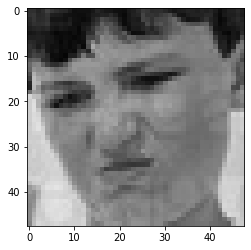

The shape of the image is (48, 48, 3)


In [ ]:
image_show('/content/drive/My Drive/FACIAL_EXPRESSION/Images/disgust/10018.jpg') 

<H3><B>PREPROCESS</B></H3>

Let's define a function to preprocess the image before passing it to the model.
The processinf function has 3 subtasks:


1.   READING THE IMAGE: We have used imread function of openCV for this.
2.   Converting the RGb image to the grayscale image.
3.   Resizing the image to a new size.

The function at last return the processed image.



In [ ]:
## PREPROCESSING IMAGES

def preprocess(img_path):
  img = cv2.imread(img_path)
  grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  grey = skimage.transform.resize(grey, (42,42,1))
  return grey

<B><H3> LOAD THE IMAGES </H3></B>

We are loading 500 images of eaxh of the expressions and labeling them as numbers 0 to 6.



In [ ]:
x = []   # image array
y = []   # target labels

for exp in os.listdir():
  count = 0  ## STORES THE COUNT OF IMAGE OF EACH TYPE
  print(f'Loading images for: {exp}')
  if(exp=='angry'):
    label=0
  elif(exp=='surprise'):
    label=1
  elif(exp=='happy'):
    label=2
  elif(exp=='fear'):
    label=3
  elif(exp=='neutral'):
    label=4
  elif(exp=='sad'):
    label=5
  else:
    label=6

  try:
    for img in os.listdir('./'+exp):
      im = preprocess('./'+exp+'/'+img)
      im = np.asarray(im)
      x.append(im)
      y.append(label)
      count+=1
      if(count==500):  
        break  #MAKE SURE THAT WE LOAD ONLY 500 IMAGES FOR EACH OF THE EXPRESSIONS
  except:
    continue

x = np.asarray(x)
y = np.asarray(y)

print(x.shape)
print(y.shape)

Loading images for: angry
Loading images for: surprise
Loading images for: happy
Loading images for: fear
Loading images for: neutral
Loading images for: sad
Loading images for: disgust
Loading images for: haarcascade_frontalface_alt.xml
(3436, 42, 42, 1)
(3436,)


<h2>Dummy Variables</h2>

> <p>Columns like season, weathersit, mnth, hr, weekday contains finite discrete values which are all independent of each other. We need a way to represent these values such that the values remain independent of each other and these must be numbers.</p>

The best way is to make a seperate column for each of the input value and represent values of each column as 0 or 1 depending on wether the input is that column or not.

Let's see by an example what it means:

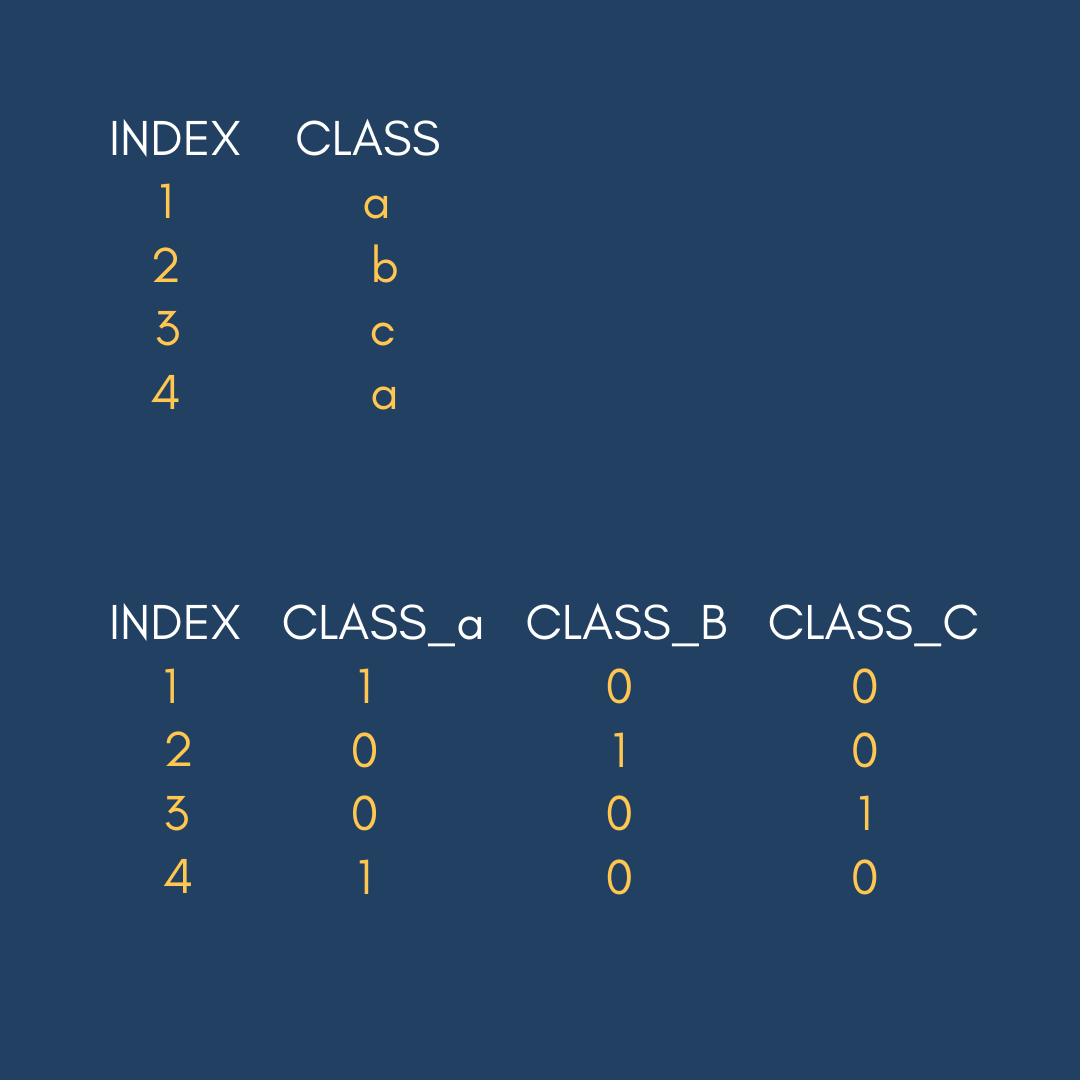



In [ ]:
from keras.utils import np_utils
from sklearn.utils import shuffle

y = np_utils.to_categorical(y,num_classes=7)
x,y= shuffle(x,y,random_state=13)

print(y)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(y.shape)

(3436, 7)


## Time to build the network


TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

  

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), padding='same',input_shape=(42,42,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Conv2D(64, kernel_size=(2,2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Conv2D(128, kernel_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], )
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 42, 42, 32)        160       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 21, 21, 64)        8256      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 11, 11, 128)       32896     
_________________________________________________________________
flatten_16 (Flatten)         (None, 15488)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)             

In [ ]:
model.fit(x, y, batch_size=64, epochs=5, validation_split=0.1)

Epoch 1/5
49/49 [==============================] - 7s 144ms/step - loss: 2.3325 - accuracy: 0.1824 - val_loss: 1.8615 - val_accuracy: 0.2645
Epoch 2/5
49/49 [==============================] - 7s 142ms/step - loss: 1.7997 - accuracy: 0.2988 - val_loss: 1.7732 - val_accuracy: 0.3169
Epoch 3/5
49/49 [==============================] - 7s 141ms/step - loss: 1.7083 - accuracy: 0.3486 - val_loss: 1.7903 - val_accuracy: 0.2936
Epoch 4/5
49/49 [==============================] - 7s 141ms/step - loss: 1.6381 - accuracy: 0.3894 - val_loss: 1.7353 - val_accuracy: 0.3256
Epoch 5/5
49/49 [==============================] - 7s 140ms/step - loss: 1.5626 - accuracy: 0.4120 - val_loss: 1.6798 - val_accuracy: 0.3547
